<a href="https://colab.research.google.com/github/wijdenhamdi/LSTM/blob/master/stock_predc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**the trend is highly non-linear and it is very difficult to capture the trend using this information. This is where the power of LSTM can be utilized. LSTM (Long Short-Term Memory network) is a type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account.**

In [0]:
#pandas is imported to read the csv file and perform preprocessing on the dataset.
import pandas
#matlpotlib is used to visualize the plot
import matplotlib.pyplot as plt
#MinMaxScalar is used to normalize the value before training
from sklearn.preprocessing import MinMaxScaler
#numpy is used to deal with the data after train and split as data will be in form of aray for training and testing.
import numpy as np
#keras has 2 models one is functional and another is sequential
from keras.models import Sequential
#Dense layer is the output layer
from keras.layers import Dense
#LSTM is Long Term Short Term Memory
from keras.layers import LSTM
#library used to calculate the mean square error. For classification accuracy is calculated and for regression mean square error is calculated
import math
from sklearn.metrics import mean_squared_error


In [0]:

# 1 /data is read using pandas and output is a dataframe
dataset = pandas.read_csv('/content/drive/My Drive/movie/tesla-stock-price/TESLA STOCK.csv')
#index is dropped
dataset = dataset.drop(dataset.index[0])
#date axis is dropped using drop function
dataset = dataset.drop(['date'], axis=1)
# 2 / filter all the data from our training set and will retain only the values for the Open column 'only price'
data = dataset.iloc[:,1:]
target = dataset.iloc[:,0]
# 3 / Data Normalization
#convert dataframe in numpy array ,'scale our data between 0 and 1'
data=data.values
data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
target =target.values


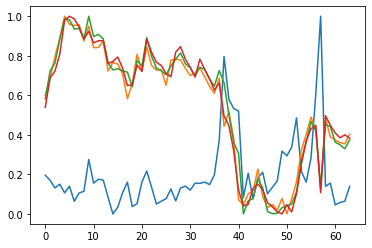

In [26]:
plt.plot(data)
plt.show()


In [13]:
#module for training and splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
print("Please show me the shape of X_train:",X_train.shape)
print("Please show me the shape of X_test:",X_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)



Please show me the shape of X_train: (42, 4)
Please show me the shape of X_test: (22, 4)
Please show me the shape of y_train: (42,)
Please show me the shape of y_test: (22,)


 **In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is **42** in our case. The second dimension is the number of time steps which is **4** while the last dimension is the number of indicators. Since we are only using one feature, Open, the number of indicators will be **1**. **

In [14]:
#converting the shape in the way machine will take for training
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print("Please show me the shape of y_train after reshape :",X_train.shape)
print("Please show me the shape of y_train after reshape :",X_test.shape)

Please show me the shape of y_train after reshape : (42, 1, 4)
Please show me the shape of y_train after reshape : (22, 1, 4)


In [24]:
model = Sequential()
#64 neurons will be used at this layer  + params input shape step+indicator
model.add(LSTM(64, input_shape=(1,4)))
#from keras.layers import Dropout
#model.add(Dropout(0.2))
#output layer contains 1 neuron to predict the output
model.add(Dense(1))
#as the data is continous, hence loss function is mean_squared_error
model.compile(loss='mean_squared_error', optimizer='sgd')
#data is trained here
model.fit(X_train, y_train, epochs=300, batch_size=1, verbose=1)

Epoch 1/300
42/42 [==============================] - 2s 38ms/step - loss: 9513.2979
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 148.7210
Epoch 3/300
42/42 [==============================] - 0s 3ms/step - loss: 148.1097
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 118.9993
Epoch 5/300
42/42 [==============================] - 0s 3ms/step - loss: 122.7856
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 107.0903
Epoch 7/300
42/42 [==============================] - 0s 4ms/step - loss: 91.0455
Epoch 8/300
42/42 [==============================] - 0s 3ms/step - loss: 72.0676
Epoch 9/300
42/42 [==============================] - 0s 3ms/step - loss: 82.4583
Epoch 10/300
42/42 [==============================] - 0s 3ms/step - loss: 98.0437
Epoch 11/300
42/42 [==============================] - 0s 3ms/step - loss: 94.8616
Epoch 12/300
42/42 [==============================] - 0s 3ms/step - loss: 114.4811
Epoch 13/300
42/

Test Score: 6.77 RMSE


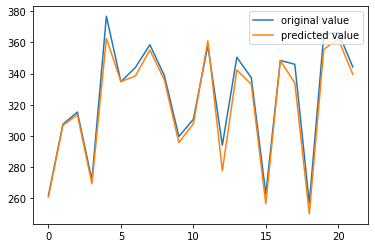

In [25]:
#prediction using X_test
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Test Score: %.2f RMSE' % (testScore))
plt.plot(y_test)
plt.plot(Predict)
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()

In [0]:
#https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/